Private Data Sample:


,name,sex,evote,dob,zip,education,citizenship,marital_status,party
0,"el-Kaleel, Shujaa",Male,0,1984-09-14,2300,Masters programmes,Denmark,Never married,Green
1,"Hamm, Miriah",Female,0,1972-12-26,2300,Bachelors programmes,Tunisia,Married/separated,Red
2,"Perkins, Brandy",Female,0,1981-12-08,2400,Vocational Education and Training (VET),Denmark,Married/separated,Green
3,"el-Saadeh, Haaroon",Male,1,1967-04-12,2400,Vocational Education and Training (VET),Denmark,Married/separated,Green
4,"el-Shabazz, Abdul Haleem",Male,0,1973-11-24,2400,Vocational Education and Training (VET),Denmark,Divorced,Green


Public Register Sample:


,name,sex,dob,zip,citizenship,marital_status,last_voted
0,"Tieu, Mercy",Female,1999-10-17,2100,Denmark,Never married,2
1,"Paxton, Corey",Male,2002-06-05,2200,Denmark,Never married,2
2,"Methuselah, Nikim",Male,1999-09-08,2200,Denmark,Never married,1
3,"el-Uddin, Abdur Rahmaan",Male,2002-06-12,2300,Denmark,Never married,2
4,"Ali, Carrie Nkaus Xwb",Female,2000-08-22,2300,Denmark,Never married,1


,Unnamed: 0,Red,Green,Invalid ballots,Total
0,Polling station: ZIP 2100,24,71,1,96
1,Polling station: ZIP 2200,52,104,1,157
2,Polling station: ZIP 2300,78,71,2,151
3,Polling station: ZIP 2400,92,124,2,218
4,E-votes,126,278,6,410


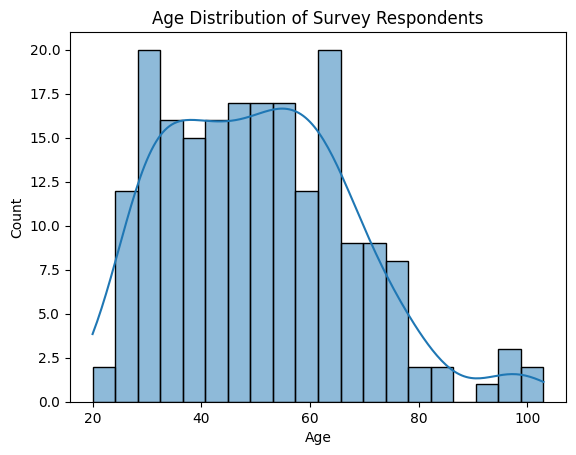

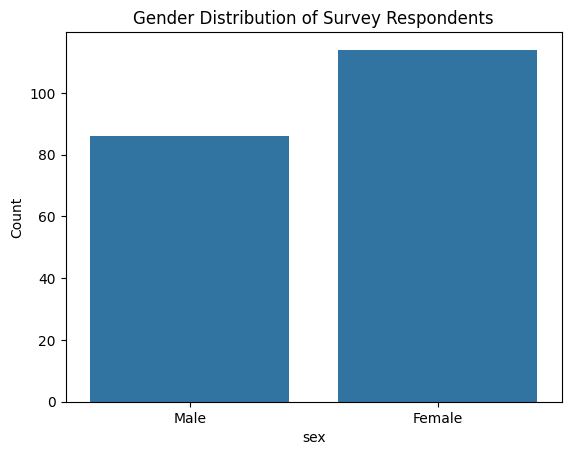

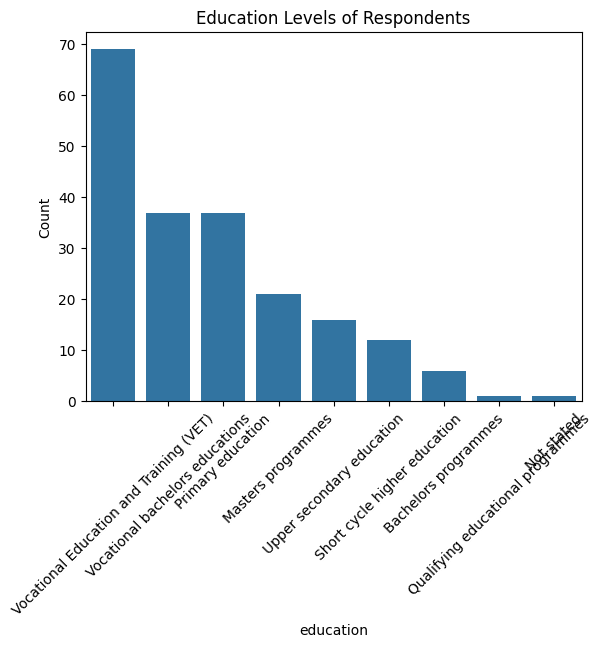

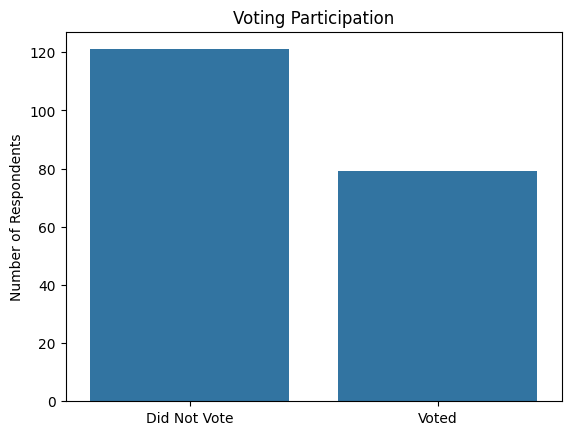

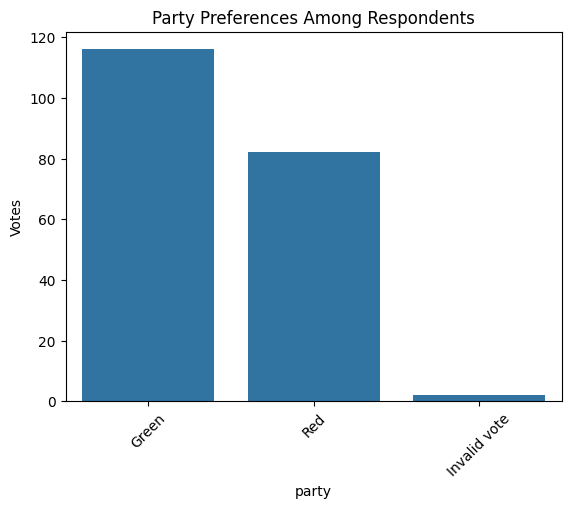

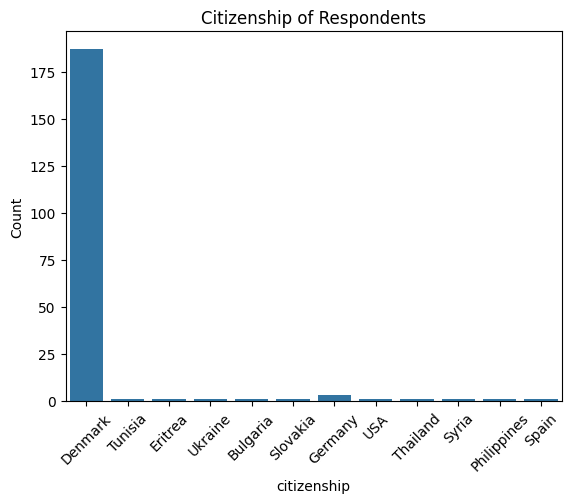

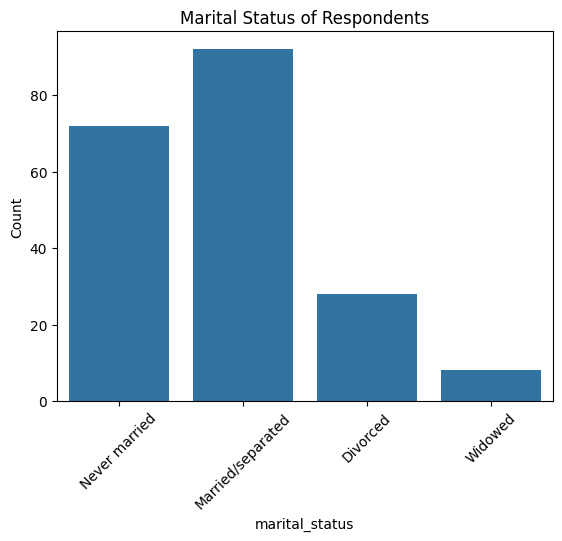

In [4]:
# 🗳️ Election Survey Analysis - Phase 1
# Author: [Your Name]
# Group: [Your Group Letter]
# Description: Analyze raw survey data to understand voter behavior and demographics.

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 📁 Load Data
private_data = pd.read_excel("private_dataF.xlsx", engine="openpyxl")
public_register = pd.read_excel("public_data_registerF.xlsx", engine="openpyxl")
public_results = pd.read_excel("public_data_resultsF.xlsx", engine="openpyxl")

# 🔍 Preview Data
print("Private Data Sample:")
display(private_data.head())

print("Public Register Sample:")
display(public_register.head())

display(public_results.head())

# 🧼 Data Cleaning & Preparation

## Convert DOB to datetime
private_data['dob'] = pd.to_datetime(private_data['dob'], errors='coerce')
public_register['dob'] = pd.to_datetime(public_register['dob'], errors='coerce')

## Calculate Age
today = pd.to_datetime("today")
private_data['age'] = today.year - private_data['dob'].dt.year
private_data['age_precise'] = (today - private_data['dob']).dt.days // 365

public_register['age'] = today.year - public_register['dob'].dt.year
public_register['age_precise'] = (today - public_register['dob']).dt.days // 365

# 📊 Step 1: Analysis of Raw Survey Data

## 1. Age Distribution
sns.histplot(private_data['age'], bins=20, kde=True)
plt.title("Age Distribution of Survey Respondents")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 2. Gender Breakdown
sns.countplot(data=private_data, x='sex')
plt.title("Gender Distribution of Survey Respondents")
plt.ylabel("Count")
plt.show()

## 3. Education Levels
edu_counts = private_data['education'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts.values)
plt.title("Education Levels of Respondents")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

## 4. Voting Behavior (evote: 1 = voted, 0 = did not vote)
vote_counts = private_data['evote'].value_counts().sort_index()
sns.barplot(x=['Did Not Vote', 'Voted'], y=vote_counts.values)
plt.title("Voting Participation")
plt.ylabel("Number of Respondents")
plt.show()

## 5. Party Preferences
party_counts = private_data['party'].value_counts()
sns.barplot(x=party_counts.index, y=party_counts.values)
plt.title("Party Preferences Among Respondents")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()

## 6. Citizenship Breakdown
sns.countplot(data=private_data, x='citizenship')
plt.title("Citizenship of Respondents")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 7. Marital Status
sns.countplot(data=private_data, x='marital_status')
plt.title("Marital Status of Respondents")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ✅ Summary
# Add markdown cells to summarize insights from each section.


STATISTICAL ANALYSIS: SURVEY VS ELECTION RESULTS

1. ELECTION RESULTS SUMMARY
----------------------------------------------------------------------

Overall Election Results:
  Red:    372 votes (36.47%)
  Green:  648 votes (63.53%)
  Total: 1020 votes

Polling Stations:
  Red:    246 votes (39.94%)
  Green:  370 votes (60.06%)
  Total:  616 votes

E-votes:
  Red:    126 votes (31.19%)
  Green:  278 votes (68.81%)
  Total:  404 votes


2. SURVEY PARTY PREFERENCES
----------------------------------------------------------------------

Survey Results (n=198):
  Red:     82 responses (41.41%)
  Green:  116 responses (58.59%)


3. STATISTICAL TEST: SURVEY vs ELECTION RESULTS
----------------------------------------------------------------------

Null Hypothesis: Survey preferences match election results

Observed (Survey):  Red=82, Green=116
Expected (Election): Red=72.21, Green=125.79

Chi-square statistic: 2.0885
P-value: 0.1484
Significance level: α = 0.05

✗ RESULT: NO SIGNIFICANT DIF

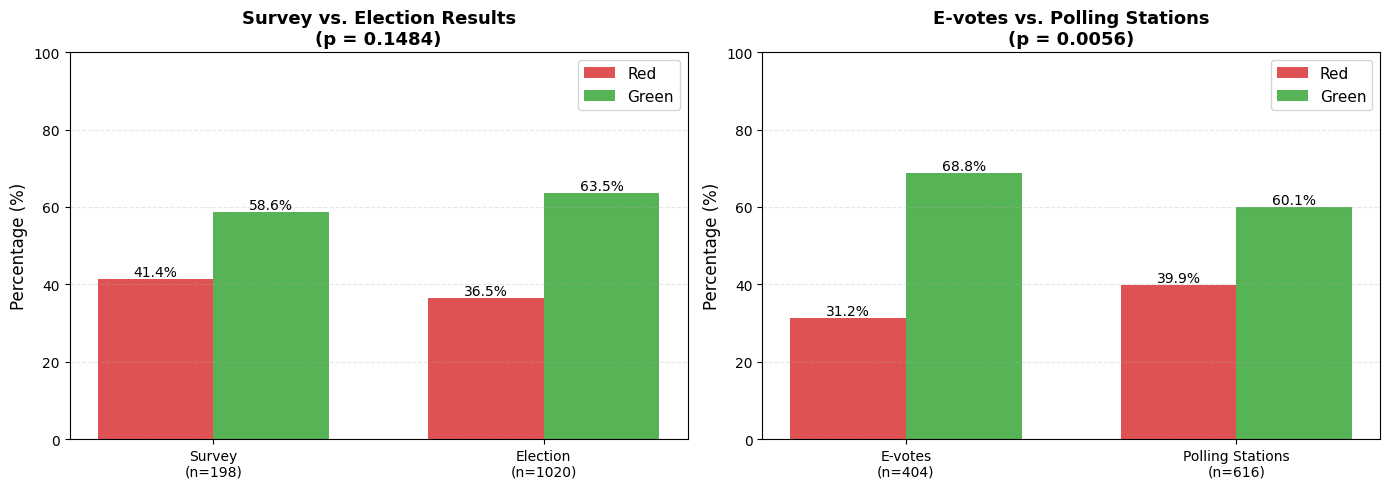


✓ Visualization saved as 'statistical_analysis.png'


SUMMARY REPORT

Key Findings:

1. Survey vs Election Results:
   - Survey Red support: 41.41%
   - Election Red support: 36.47%
   - Statistical significance: NO (p = 0.1484)
   
2. E-votes vs Polling Stations:
   - E-votes Red support: 31.19%
   - Polling Red support: 39.94%
   - Statistical significance: YES (p = 0.0056)

3. Sample Sizes:
   - Survey: 198 respondents
   - E-votes: 404 votes
   - Polling Stations: 616 votes
   - Total Election: 1020 votes



In [9]:
# 📊 Statistical Analysis: Survey vs Election Results
# Add this section after your existing analysis

from scipy.stats import chi2_contingency, chisquare

print("="*70)
print("STATISTICAL ANALYSIS: SURVEY VS ELECTION RESULTS")
print("="*70)

# ============================================================================
# PART 1: Prepare Election Results Data
# ============================================================================

print("\n1. ELECTION RESULTS SUMMARY")
print("-"*70)

# Calculate totals from public_results
# Assuming the structure you showed: rows for polling stations and e-votes
# with columns: Unnamed: 0, Red, Green, Invalid ballots, Total

# Separate polling stations from e-votes
polling_mask = public_results['Unnamed: 0'].str.contains('Polling', na=False)
evotes_mask = public_results['Unnamed: 0'].str.contains('E-votes', na=False)

polling_data = public_results[polling_mask]
evotes_data = public_results[evotes_mask]

# Calculate totals
polling_red = polling_data['Red'].sum()
polling_green = polling_data['Green'].sum()
polling_total = polling_red + polling_green

evotes_red = evotes_data['Red'].sum()
evotes_green = evotes_data['Green'].sum()
evotes_total = evotes_red + evotes_green

total_red = polling_red + evotes_red
total_green = polling_green + evotes_green
total_votes = total_red + total_green

print(f"\nOverall Election Results:")
print(f"  Red:   {total_red:4d} votes ({total_red/total_votes*100:.2f}%)")
print(f"  Green: {total_green:4d} votes ({total_green/total_votes*100:.2f}%)")
print(f"  Total: {total_votes:4d} votes")

print(f"\nPolling Stations:")
print(f"  Red:   {polling_red:4d} votes ({polling_red/polling_total*100:.2f}%)")
print(f"  Green: {polling_green:4d} votes ({polling_green/polling_total*100:.2f}%)")
print(f"  Total: {polling_total:4d} votes")

print(f"\nE-votes:")
print(f"  Red:   {evotes_red:4d} votes ({evotes_red/evotes_total*100:.2f}%)")
print(f"  Green: {evotes_green:4d} votes ({evotes_green/evotes_total*100:.2f}%)")
print(f"  Total: {evotes_total:4d} votes")

# ============================================================================
# PART 2: Survey Party Preferences
# ============================================================================

print("\n\n2. SURVEY PARTY PREFERENCES")
print("-"*70)

# Get survey counts
survey_red = (private_data['party'] == 'Red').sum()
survey_green = (private_data['party'] == 'Green').sum()
survey_total = survey_red + survey_green

print(f"\nSurvey Results (n={survey_total}):")
print(f"  Red:   {survey_red:4d} responses ({survey_red/survey_total*100:.2f}%)")
print(f"  Green: {survey_green:4d} responses ({survey_green/survey_total*100:.2f}%)")

# ============================================================================
# PART 3: Chi-Square Test - Survey vs Election Results
# ============================================================================

print("\n\n3. STATISTICAL TEST: SURVEY vs ELECTION RESULTS")
print("-"*70)

# Calculate expected counts based on election proportions
election_red_prop = total_red / total_votes
election_green_prop = total_green / total_votes

expected_red = survey_total * election_red_prop
expected_green = survey_total * election_green_prop

# Perform chi-square goodness of fit test
observed = np.array([survey_red, survey_green])
expected = np.array([expected_red, expected_green])

chi2_stat, p_value = chisquare(observed, expected)

print(f"\nNull Hypothesis: Survey preferences match election results")
print(f"\nObserved (Survey):  Red={survey_red}, Green={survey_green}")
print(f"Expected (Election): Red={expected_red:.2f}, Green={expected_green:.2f}")
print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance level: α = 0.05")

if p_value < 0.05:
    print(f"\n✓ RESULT: SIGNIFICANT DIFFERENCE (p = {p_value:.4f} < 0.05)")
    print("  → The survey preferences differ significantly from election results")
    
    # Calculate the difference
    diff_red = (survey_red/survey_total - election_red_prop) * 100
    diff_green = (survey_green/survey_total - election_green_prop) * 100
    
    print(f"\n  Difference in Red support: {diff_red:+.2f} percentage points")
    print(f"  Difference in Green support: {diff_green:+.2f} percentage points")
else:
    print(f"\n✗ RESULT: NO SIGNIFICANT DIFFERENCE (p = {p_value:.4f} ≥ 0.05)")
    print("  → The survey preferences are consistent with election results")

# ============================================================================
# PART 4: Chi-Square Test - E-votes vs Polling Stations
# ============================================================================

print("\n\n4. STATISTICAL TEST: E-VOTES vs POLLING STATIONS")
print("-"*70)

# Create contingency table
contingency_table = np.array([
    [evotes_red, evotes_green],
    [polling_red, polling_green]
])

print("\nContingency Table:")
contingency_df = pd.DataFrame(
    contingency_table,
    columns=['Red', 'Green'],
    index=['E-votes', 'Polling Stations']
)
print(contingency_df)
print(f"\nRow percentages:")
print(contingency_df.div(contingency_df.sum(axis=1), axis=0) * 100)

# Perform chi-square test of independence
chi2_stat2, p_value2, dof, expected_freq = chi2_contingency(contingency_table)

print(f"\nNull Hypothesis: E-votes and polling stations have the same party distribution")
print(f"\nChi-square statistic: {chi2_stat2:.4f}")
print(f"P-value: {p_value2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significance level: α = 0.05")

if p_value2 < 0.05:
    print(f"\n✓ RESULT: SIGNIFICANT DIFFERENCE (p = {p_value2:.4f} < 0.05)")
    print("  → E-votes and polling stations have significantly different distributions")
    
    # Calculate the difference
    evotes_red_pct = evotes_red/evotes_total * 100
    polling_red_pct = polling_red/polling_total * 100
    diff = evotes_red_pct - polling_red_pct
    
    print(f"\n  E-votes Red support: {evotes_red_pct:.2f}%")
    print(f"  Polling Red support: {polling_red_pct:.2f}%")
    print(f"  Difference: {diff:+.2f} percentage points")
else:
    print(f"\n✗ RESULT: NO SIGNIFICANT DIFFERENCE (p = {p_value2:.4f} ≥ 0.05)")
    print("  → E-votes and polling stations have similar party distributions")

# ============================================================================
# PART 5: Visualization
# ============================================================================

print("\n\n5. CREATING VISUALIZATIONS...")
print("-"*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Survey vs Election
categories = ['Survey\n(n={})'.format(survey_total), 
              'Election\n(n={})'.format(total_votes)]
red_pcts = [survey_red/survey_total*100, total_red/total_votes*100]
green_pcts = [survey_green/survey_total*100, total_green/total_votes*100]

x = np.arange(len(categories))
width = 0.35

bars1 = axes[0].bar(x - width/2, red_pcts, width, label='Red', color='#d62728', alpha=0.8)
bars2 = axes[0].bar(x + width/2, green_pcts, width, label='Green', color='#2ca02c', alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=10)

axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].set_title(f'Survey vs. Election Results\n(p = {p_value:.4f})', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories)
axes[0].legend(fontsize=11)
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: E-votes vs Polling Stations
categories2 = ['E-votes\n(n={})'.format(evotes_total), 
               'Polling Stations\n(n={})'.format(polling_total)]
red_pcts2 = [evotes_red/evotes_total*100, polling_red/polling_total*100]
green_pcts2 = [evotes_green/evotes_total*100, polling_green/polling_total*100]

x2 = np.arange(len(categories2))

bars3 = axes[1].bar(x2 - width/2, red_pcts2, width, label='Red', color='#d62728', alpha=0.8)
bars4 = axes[1].bar(x2 + width/2, green_pcts2, width, label='Green', color='#2ca02c', alpha=0.8)

# Add value labels on bars
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=10)

axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title(f'E-votes vs. Polling Stations\n(p = {p_value2:.4f})', fontsize=13, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(categories2)
axes[1].legend(fontsize=11)
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('statistical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'statistical_analysis.png'")

# ============================================================================
# PART 6: Summary Report
# ============================================================================

print("\n\n" + "="*70)
print("SUMMARY REPORT")
print("="*70)

print(f"""
Key Findings:

1. Survey vs Election Results:
   - Survey Red support: {survey_red/survey_total*100:.2f}%
   - Election Red support: {total_red/total_votes*100:.2f}%
   - Statistical significance: {'YES' if p_value < 0.05 else 'NO'} (p = {p_value:.4f})
   
2. E-votes vs Polling Stations:
   - E-votes Red support: {evotes_red/evotes_total*100:.2f}%
   - Polling Red support: {polling_red/polling_total*100:.2f}%
   - Statistical significance: {'YES' if p_value2 < 0.05 else 'NO'} (p = {p_value2:.4f})

3. Sample Sizes:
   - Survey: {survey_total} respondents
   - E-votes: {evotes_total} votes
   - Polling Stations: {polling_total} votes
   - Total Election: {total_votes} votes
""")


=== ELECTION RESULTS ===
Total: Red=372 (36.5%), Green=648 (63.5%)
Survey: Red=82 (41.4%), Green=116 (58.6%)

=== TEST 1: SURVEY vs ELECTION ===
Chi-square = 2.088, p-value = 0.1484
→ No significant difference

=== TEST 2: E-VOTES vs POLLING STATIONS ===
         Red  Green
E-votes  126    278
Polling  246    370
Chi-square = 7.684, p-value = 0.0056
→ Significant difference: voting channel affects party choice


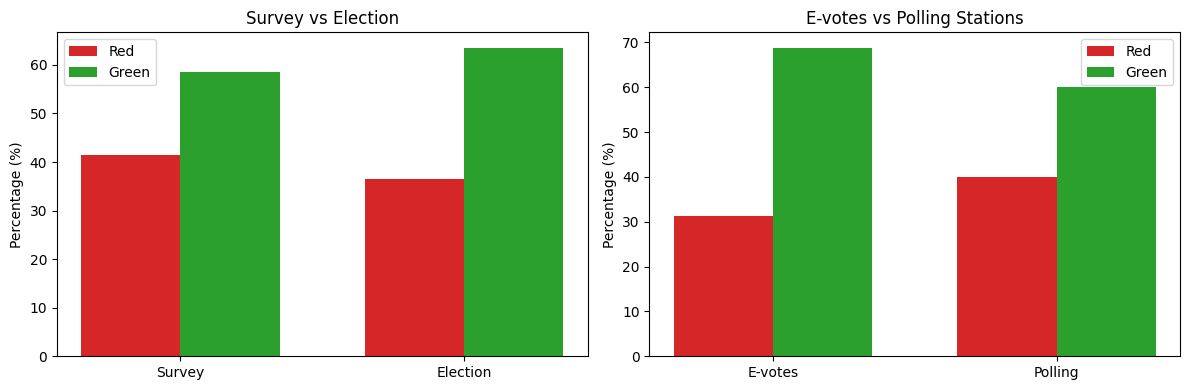

In [10]:
# 📊 Statistical Analysis: Survey vs Election Results
from scipy.stats import chi2_contingency, chisquare
import numpy as np

# Prepare election results
polling = public_results[public_results['Unnamed: 0'].str.contains('Polling', na=False)]
evotes = public_results[public_results['Unnamed: 0'].str.contains('E-votes', na=False)]

polling_red, polling_green = polling['Red'].sum(), polling['Green'].sum()
evotes_red, evotes_green = evotes['Red'].sum(), evotes['Green'].sum()
total_red, total_green = polling_red + evotes_red, polling_green + evotes_green

# Survey preferences
survey_red = (private_data['party'] == 'Red').sum()
survey_green = (private_data['party'] == 'Green').sum()
survey_total = survey_red + survey_green

print("\n=== ELECTION RESULTS ===")
print(f"Total: Red={total_red} ({total_red/(total_red+total_green)*100:.1f}%), Green={total_green} ({total_green/(total_red+total_green)*100:.1f}%)")
print(f"Survey: Red={survey_red} ({survey_red/survey_total*100:.1f}%), Green={survey_green} ({survey_green/survey_total*100:.1f}%)")

# Test 1: Survey vs Election
print("\n=== TEST 1: SURVEY vs ELECTION ===")
election_props = np.array([total_red/(total_red+total_green), total_green/(total_red+total_green)])
expected = survey_total * election_props
observed = np.array([survey_red, survey_green])

chi2, p = chisquare(observed, expected)
print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Significant difference: survey differs from election results")
else:
    print("→ No significant difference")

# Test 2: E-votes vs Polling Stations
print("\n=== TEST 2: E-VOTES vs POLLING STATIONS ===")
table = np.array([[evotes_red, evotes_green], [polling_red, polling_green]])
print(pd.DataFrame(table, columns=['Red', 'Green'], index=['E-votes', 'Polling']))

chi2, p, dof, _ = chi2_contingency(table)
print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Significant difference: voting channel affects party choice")
else:
    print("→ No significant difference")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Survey vs Election
x = np.arange(2)
width = 0.35
axes[0].bar(x - width/2, [survey_red/survey_total*100, total_red/(total_red+total_green)*100], 
            width, label='Red', color='#d62728')
axes[0].bar(x + width/2, [survey_green/survey_total*100, total_green/(total_red+total_green)*100], 
            width, label='Green', color='#2ca02c')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Survey', 'Election'])
axes[0].set_ylabel('Percentage (%)')
axes[0].set_title('Survey vs Election')
axes[0].legend()

# Plot 2: E-votes vs Polling
axes[1].bar(x - width/2, [evotes_red/(evotes_red+evotes_green)*100, polling_red/(polling_red+polling_green)*100], 
            width, label='Red', color='#d62728')
axes[1].bar(x + width/2, [evotes_green/(evotes_red+evotes_green)*100, polling_green/(polling_red+polling_green)*100], 
            width, label='Green', color='#2ca02c')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['E-votes', 'Polling'])
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('E-votes vs Polling Stations')
axes[1].legend()

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Group goopers Dataset F-20251103\\private_dataF.xlsx'